In [1]:
import pandas as pd
import seaborn as sns

In [2]:
df = pd.read_excel("D:\\5.1_Machine_Learning_Code\\Clustering\\EXL Shared Partner Data.xlsx")

In [ ]:
df.head()

In [4]:
df.tail()

,Application_Nr,QuoteGeneratedDate,OfferCoverageAmount,Offer_Stat_Desc,OfferPremiumAmount,OfferBillingMethod,Pmnt_Freq_Desc,Effective_Date,Paid_To_Date,Offered_NAP,Issued_NAP,CurrentBillMethod,ProductType,Age_at_AppReceived,PartnerMarker
458867,CUNA17318494,2022-09-07,70000,Carrier declined to issue,186.6,ACH/PAC,Monthly,NaT,NaT,2239.2,NaN,NaN,SI Term Band 1,61.0,Ethos
458868,CUNA17318495,2022-09-07,300000,Lapsed Abandoned,68.0,ACH/PAC,Monthly,NaT,NaT,816.0,NaN,NaN,SI Term Band 2,NaN,Ethos
458869,CUNA17318508,2022-09-07,250000,Lapsed Abandoned,55.0,ACH/PAC,Monthly,NaT,NaT,660.0,NaN,NaN,SI Term Band 2,33.0,Liberty
458870,CUNA17318525,2022-09-07,80000,Lapsed Abandoned,89.4,ACH/PAC,Monthly,NaT,NaT,1072.8,NaN,NaN,TAWL,32.0,Liberty
458871,CUNA17318599,2022-09-07,30000,Lapsed Abandoned,294.3,ACH/PAC,Monthly,NaT,NaT,3531.6,NaN,NaN,TAWL,NaN,Liberty


In [5]:
df.shape

(458872, 15)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 458872 entries, 0 to 458871
Data columns (total 15 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   Application_Nr       458862 non-null  object        
 1   QuoteGeneratedDate   458872 non-null  datetime64[ns]
 2   OfferCoverageAmount  458872 non-null  int64         
 3   Offer_Stat_Desc      458872 non-null  object        
 4   OfferPremiumAmount   458872 non-null  float64       
 5   OfferBillingMethod   458872 non-null  object        
 6   Pmnt_Freq_Desc       458832 non-null  object        
 7   Effective_Date       190605 non-null  datetime64[ns]
 8   Paid_To_Date         190605 non-null  datetime64[ns]
 9   Offered_NAP          458872 non-null  float64       
 10  Issued_NAP           190605 non-null  float64       
 11  CurrentBillMethod    190605 non-null  object        
 12  ProductType          458862 non-null  object        
 13  Age_at_AppRece

In [7]:
df.describe()

,QuoteGeneratedDate,OfferCoverageAmount,OfferPremiumAmount,Effective_Date,Paid_To_Date,Offered_NAP,Issued_NAP,Age_at_AppReceived
count,458872,458872.000000,458872.000000,190605,190605,458872.000000,190605.000000,400627.000000
mean,2021-05-29 14:39:36.317578240,41713.013651,75.453247,2021-05-09 20:43:12.611946240,2021-12-18 12:22:37.840559872,891.680556,864.271308,55.467078
min,2018-02-07 00:00:00,1000.000000,0.000000,2018-02-08 00:00:00,2018-02-13 00:00:00,0.000000,0.000000,17.000000
25%,2020-12-02 00:00:00,10000.000000,40.500000,2020-10-17 00:00:00,2021-06-15 00:00:00,485.280000,462.000000,48.000000
50%,2021-07-19 00:00:00,20000.000000,57.300000,2021-06-24 00:00:00,2022-04-01 00:00:00,684.960000,682.680000,58.000000
75%,2022-02-03 00:00:00,45000.000000,90.700000,2022-01-10 00:00:00,2022-09-19 00:00:00,1081.200000,1077.600000,65.000000
max,2022-09-07 00:00:00,300000.000000,5124.000000,2022-11-01 00:00:00,2024-05-01 00:00:00,14496.000000,14496.000000,96.000000
std,NaN,61338.126792,68.232138,NaN,NaN,709.771734,663.639863,13.235514


In [8]:
from datetime import datetime
df['Quote_Year_month'] = df['QuoteGeneratedDate'].apply(lambda x: datetime.strftime(x, '%Y-%m'))

In [9]:
df['Quote_Year'] = df['QuoteGeneratedDate'].apply(lambda x: datetime.strftime(x, '%Y'))

In [10]:
df.head(2)

,Application_Nr,QuoteGeneratedDate,OfferCoverageAmount,Offer_Stat_Desc,OfferPremiumAmount,OfferBillingMethod,Pmnt_Freq_Desc,Effective_Date,Paid_To_Date,Offered_NAP,Issued_NAP,CurrentBillMethod,ProductType,Age_at_AppReceived,PartnerMarker,Quote_Year_month,Quote_Year
0,CUNA11261506,2018-02-07,15000,Void,13.75,Credit Card,Monthly,NaT,NaT,165.0,NaN,NaN,SI Term Band 1,53.0,Liberty,2018-02,2018
1,CUNA11263501,2018-02-08,10000,Signed,74.80,Credit Card,Monthly,2018-02-08,2022-09-08,897.6,897.6,PAC,SI Whole Life,70.0,Liberty,2018-02,2018


In [11]:
data = df.groupby(['Quote_Year'])['OfferCoverageAmount'].sum().reset_index(name="coverage_sum")

In [12]:
data_month = df.groupby(['Quote_Year_month'])['OfferCoverageAmount'].sum().reset_index(name="coverage_sum")

In [13]:
data_month.head()

,Quote_Year_month,coverage_sum
0,2018-02,3379000
1,2018-03,7988000
2,2018-04,6284000
3,2018-05,6705000
4,2018-06,6586000


In [14]:
data_month.shape

(56, 2)

In [15]:
data.head(2)

,Quote_Year,coverage_sum
0,2018,179392000
1,2019,1096232000


In [16]:
data

,Quote_Year,coverage_sum
0,2018,179392000
1,2019,1096232000
2,2020,2505178000
3,2021,7213646000
4,2022,8146486000


In [17]:
data.shape

(5, 2)

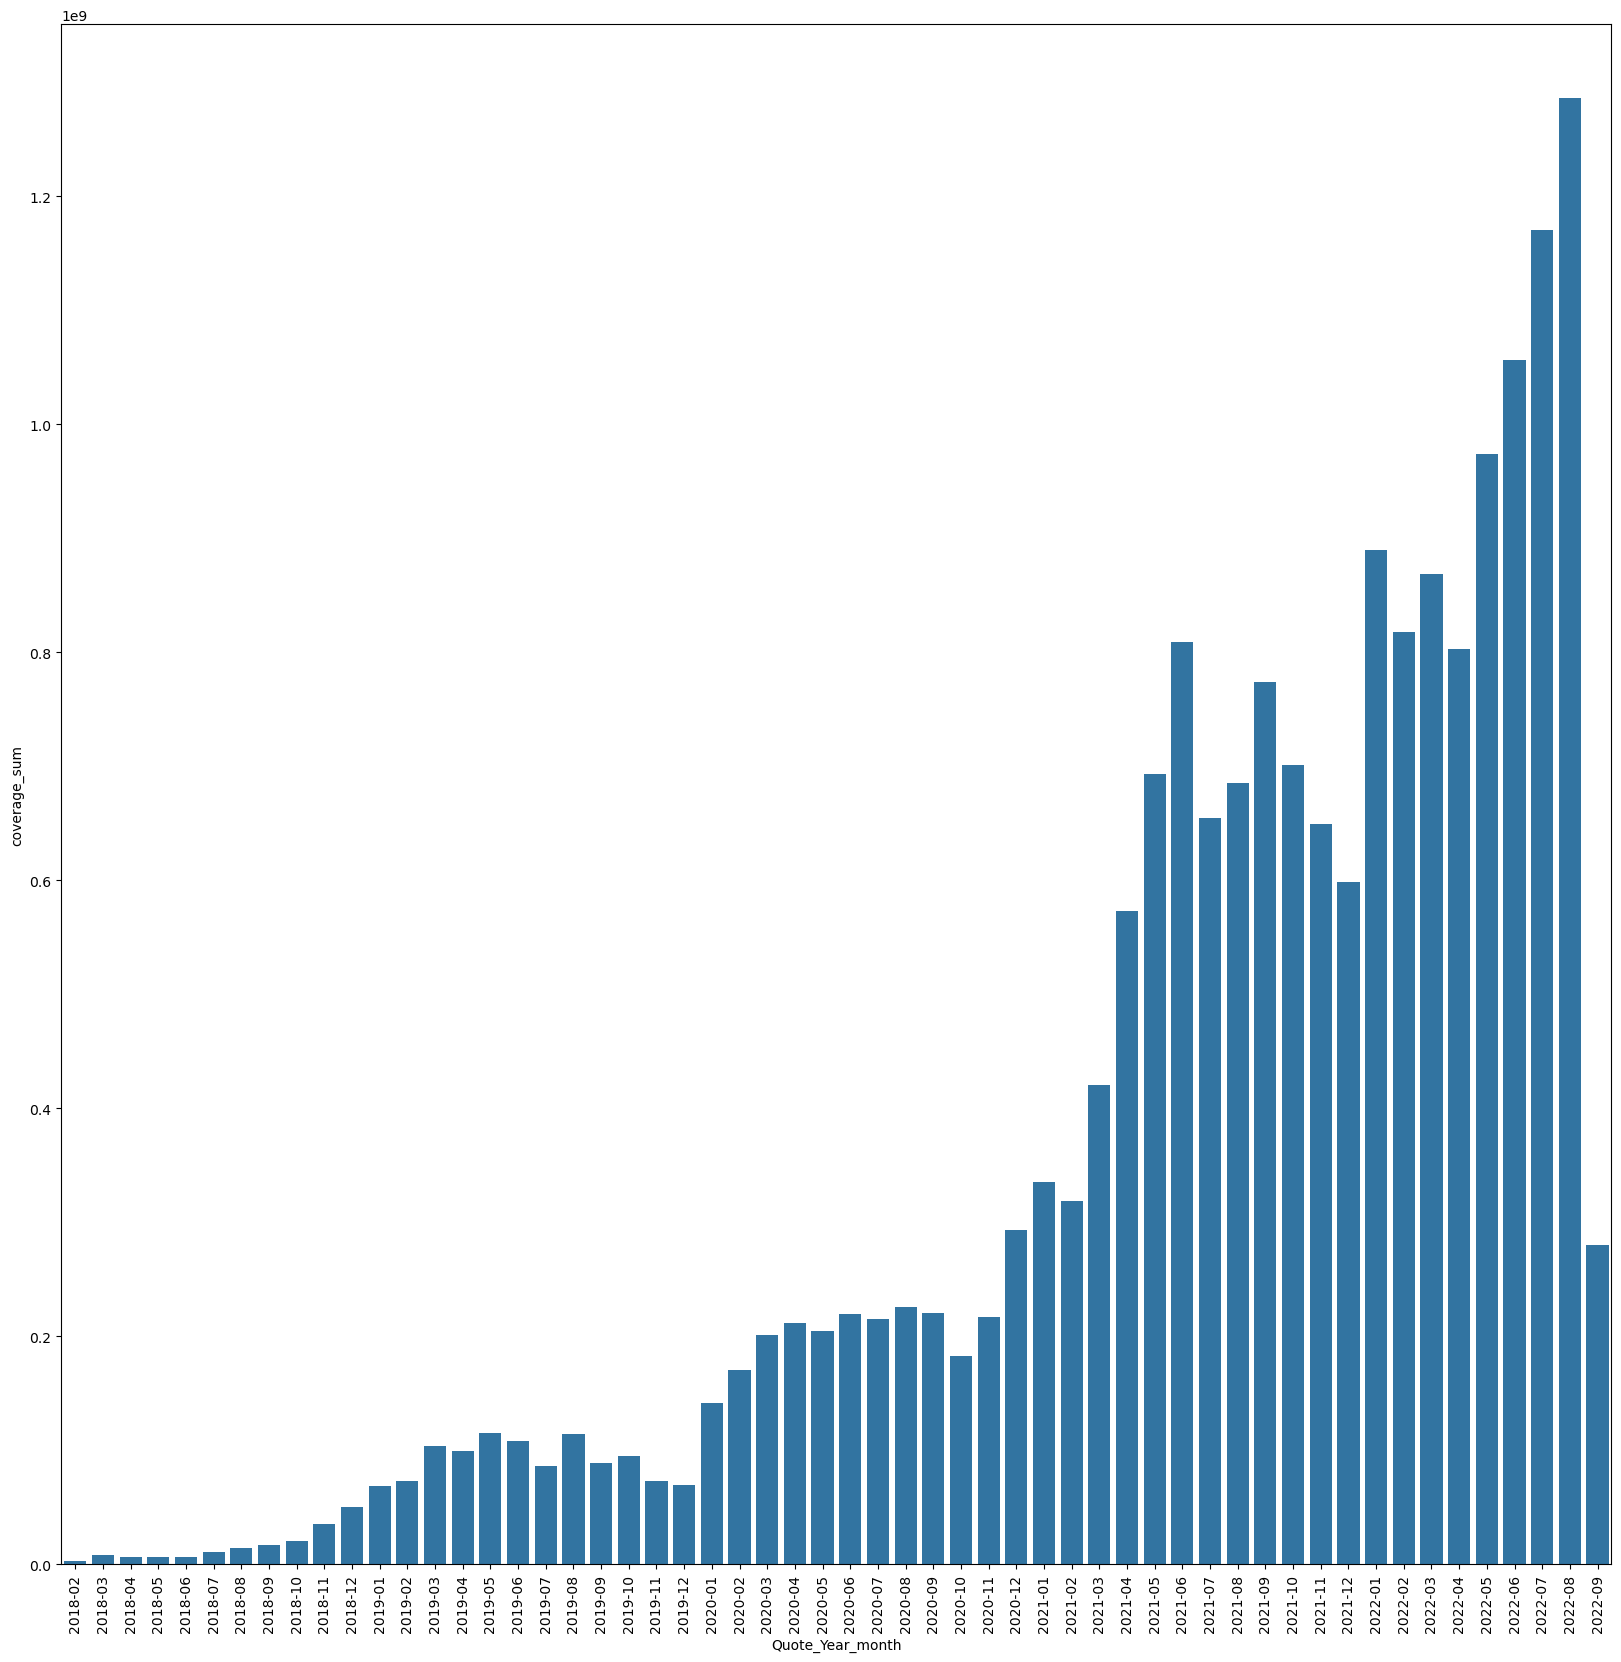

In [23]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20, 20))
# Create the barplot
sns.barplot(x='Quote_Year_month', y='coverage_sum', data=data_month)
# Rotate x-axis labels for better readability
plt.xticks(rotation=90)
# Display the plot
plt.show()

In [25]:
data = df.groupby(['Quote_Year'])['OfferCoverageAmount'].sum().reset_index(name="coverage_sum")

In [27]:
df.head()

,Application_Nr,QuoteGeneratedDate,OfferCoverageAmount,Offer_Stat_Desc,OfferPremiumAmount,OfferBillingMethod,Pmnt_Freq_Desc,Effective_Date,Paid_To_Date,Offered_NAP,Issued_NAP,CurrentBillMethod,ProductType,Age_at_AppReceived,PartnerMarker,Quote_Year_month,Quote_Year
0,CUNA11261506,2018-02-07,15000,Void,13.75,Credit Card,Monthly,NaT,NaT,165.0,NaN,NaN,SI Term Band 1,53.0,Liberty,2018-02,2018
1,CUNA11263501,2018-02-08,10000,Signed,74.80,Credit Card,Monthly,2018-02-08,2022-09-08,897.6,897.6,PAC,SI Whole Life,70.0,Liberty,2018-02,2018
2,CUNA11264400,2018-02-09,15000,Signed,42.35,Credit Card,Monthly,2018-02-09,2022-10-09,508.2,508.2,DIR,SI Whole Life,54.0,Liberty,2018-02,2018
3,CUNA11264436,2018-02-09,15000,Signed,57.05,Credit Card,Monthly,2018-02-09,2022-10-09,684.6,684.6,DIR,SI Whole Life,58.0,Liberty,2018-02,2018
4,CUNA11264525,2018-02-09,10000,Signed,27.80,ACH/PAC,Monthly,2018-02-12,2021-02-12,333.6,333.6,PAC,SI Term Band 1,65.0,Liberty,2018-02,2018


In [29]:
data.shape

(5, 2)

In [31]:
data.head()

,Quote_Year,coverage_sum
0,2018,179392000
1,2019,1096232000
2,2020,2505178000
3,2021,7213646000
4,2022,8146486000


In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 458872 entries, 0 to 458871
Data columns (total 17 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   Application_Nr       458862 non-null  object        
 1   QuoteGeneratedDate   458872 non-null  datetime64[ns]
 2   OfferCoverageAmount  458872 non-null  int64         
 3   Offer_Stat_Desc      458872 non-null  object        
 4   OfferPremiumAmount   458872 non-null  float64       
 5   OfferBillingMethod   458872 non-null  object        
 6   Pmnt_Freq_Desc       458832 non-null  object        
 7   Effective_Date       190605 non-null  datetime64[ns]
 8   Paid_To_Date         190605 non-null  datetime64[ns]
 9   Offered_NAP          458872 non-null  float64       
 10  Issued_NAP           190605 non-null  float64       
 11  CurrentBillMethod    190605 non-null  object        
 12  ProductType          458862 non-null  object        
 13  Age_at_AppRece

In [35]:
df.isna().sum()

Application_Nr             10
QuoteGeneratedDate          0
OfferCoverageAmount         0
Offer_Stat_Desc             0
OfferPremiumAmount          0
OfferBillingMethod          0
Pmnt_Freq_Desc             40
Effective_Date         268267
Paid_To_Date           268267
Offered_NAP                 0
Issued_NAP             268267
CurrentBillMethod      268267
ProductType                10
Age_at_AppReceived      58245
PartnerMarker               0
Quote_Year_month            0
Quote_Year                  0
dtype: int64

In [37]:
df = df.dropna(subset=['Application_Nr'])

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 458862 entries, 0 to 458871
Data columns (total 17 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   Application_Nr       458862 non-null  object        
 1   QuoteGeneratedDate   458862 non-null  datetime64[ns]
 2   OfferCoverageAmount  458862 non-null  int64         
 3   Offer_Stat_Desc      458862 non-null  object        
 4   OfferPremiumAmount   458862 non-null  float64       
 5   OfferBillingMethod   458862 non-null  object        
 6   Pmnt_Freq_Desc       458822 non-null  object        
 7   Effective_Date       190605 non-null  datetime64[ns]
 8   Paid_To_Date         190605 non-null  datetime64[ns]
 9   Offered_NAP          458862 non-null  float64       
 10  Issued_NAP           190605 non-null  float64       
 11  CurrentBillMethod    190605 non-null  object        
 12  ProductType          458852 non-null  object        
 13  Age_at_AppReceived 

In [40]:
df.columns

Index(['Application_Nr', 'QuoteGeneratedDate', 'OfferCoverageAmount',
       'Offer_Stat_Desc', 'OfferPremiumAmount', 'OfferBillingMethod',
       'Pmnt_Freq_Desc', 'Effective_Date', 'Paid_To_Date', 'Offered_NAP',
       'Issued_NAP', 'CurrentBillMethod', 'ProductType', 'Age_at_AppReceived',
       'PartnerMarker', 'Quote_Year_month', 'Quote_Year'],
      dtype='object')

In [43]:
df.head(2)

,Application_Nr,QuoteGeneratedDate,OfferCoverageAmount,Offer_Stat_Desc,OfferPremiumAmount,OfferBillingMethod,Pmnt_Freq_Desc,Effective_Date,Paid_To_Date,Offered_NAP,Issued_NAP,CurrentBillMethod,ProductType,Age_at_AppReceived,PartnerMarker,Quote_Year_month,Quote_Year
0,CUNA11261506,2018-02-07,15000,Void,13.75,Credit Card,Monthly,NaT,NaT,165.0,NaN,NaN,SI Term Band 1,53.0,Liberty,2018-02,2018
1,CUNA11263501,2018-02-08,10000,Signed,74.80,Credit Card,Monthly,2018-02-08,2022-09-08,897.6,897.6,PAC,SI Whole Life,70.0,Liberty,2018-02,2018


In [45]:
df = df[['OfferCoverageAmount','Offer_Stat_Desc', 'OfferPremiumAmount', 'OfferBillingMethod',
       'Pmnt_Freq_Desc','Offered_NAP','Issued_NAP', 'CurrentBillMethod', 'ProductType', 'Age_at_AppReceived',
       'PartnerMarker']]

In [47]:
df.isna().sum()

OfferCoverageAmount         0
Offer_Stat_Desc             0
OfferPremiumAmount          0
OfferBillingMethod          0
Pmnt_Freq_Desc             40
Offered_NAP                 0
Issued_NAP             268257
CurrentBillMethod      268257
ProductType                10
Age_at_AppReceived      58235
PartnerMarker               0
dtype: int64

In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 458862 entries, 0 to 458871
Data columns (total 11 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   OfferCoverageAmount  458862 non-null  int64  
 1   Offer_Stat_Desc      458862 non-null  object 
 2   OfferPremiumAmount   458862 non-null  float64
 3   OfferBillingMethod   458862 non-null  object 
 4   Pmnt_Freq_Desc       458822 non-null  object 
 5   Offered_NAP          458862 non-null  float64
 6   Issued_NAP           190605 non-null  float64
 7   CurrentBillMethod    190605 non-null  object 
 8   ProductType          458852 non-null  object 
 9   Age_at_AppReceived   400627 non-null  float64
 10  PartnerMarker        458862 non-null  object 
dtypes: float64(4), int64(1), object(6)
memory usage: 42.0+ MB


In [50]:
data.isna().sum()

Quote_Year      0
coverage_sum    0
dtype: int64

In [51]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Quote_Year    5 non-null      object
 1   coverage_sum  5 non-null      int64 
dtypes: int64(1), object(1)
memory usage: 212.0+ bytes


In [67]:
def null_values(base_dataset):
    # Identify columns
    cont = base_dataset.select_dtypes(include=['number']).columns
    cat = base_dataset.select_dtypes(exclude=['number']).columns

    # Fill missing values
    for col in cat:
        base_dataset[col].fillna(base_dataset[col].mode()[0], inplace=True)
    for col in cont:
        base_dataset[col].fillna(base_dataset[col].median(), inplace=True)
    
    print(base_dataset.isna().sum())  # Check remaining null values
    return base_dataset, cat, cont


In [75]:
base_dataset.value_counts()

col1  col2  col3
1.0   a     6.5     1
2.0   a     5.0     1
            7.0     1
      b     6.0     1
4.0   c     8.0     1
Name: count, dtype: int64

In [77]:
base_dataset.value_counts().index[0]

(1.0, 'a', 6.5)

In [79]:
len(base_dataset.isna().sum().index)

3

In [81]:
data_cleaned,cat,cont = null_values(df)

C:\Users\govindarajulu\AppData\Local\Temp\ipykernel_1160\1209508004.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  base_dataset[col].fillna(base_dataset[col].mode()[0], inplace=True)
C:\Users\govindarajulu\AppData\Local\Temp\ipykernel_1160\1209508004.py:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values 

OfferCoverageAmount    0
Offer_Stat_Desc        0
OfferPremiumAmount     0
OfferBillingMethod     0
Pmnt_Freq_Desc         0
Offered_NAP            0
Issued_NAP             0
CurrentBillMethod      0
ProductType            0
Age_at_AppReceived     0
PartnerMarker          0
dtype: int64


In [83]:
data_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 458862 entries, 0 to 458871
Data columns (total 11 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   OfferCoverageAmount  458862 non-null  int64  
 1   Offer_Stat_Desc      458862 non-null  object 
 2   OfferPremiumAmount   458862 non-null  float64
 3   OfferBillingMethod   458862 non-null  object 
 4   Pmnt_Freq_Desc       458862 non-null  object 
 5   Offered_NAP          458862 non-null  float64
 6   Issued_NAP           458862 non-null  float64
 7   CurrentBillMethod    458862 non-null  object 
 8   ProductType          458862 non-null  object 
 9   Age_at_AppReceived   458862 non-null  float64
 10  PartnerMarker        458862 non-null  object 
dtypes: float64(4), int64(1), object(6)
memory usage: 42.0+ MB


In [89]:
cat

Index(['Offer_Stat_Desc', 'OfferBillingMethod', 'Pmnt_Freq_Desc',
       'CurrentBillMethod', 'ProductType', 'PartnerMarker'],
      dtype='object')

In [91]:
cont

Index(['OfferCoverageAmount', 'OfferPremiumAmount', 'Offered_NAP',
       'Issued_NAP', 'Age_at_AppReceived'],
      dtype='object')

In [93]:
data_cleaned.head(2)

,OfferCoverageAmount,Offer_Stat_Desc,OfferPremiumAmount,OfferBillingMethod,Pmnt_Freq_Desc,Offered_NAP,Issued_NAP,CurrentBillMethod,ProductType,Age_at_AppReceived,PartnerMarker
0,15000,Void,13.75,Credit Card,Monthly,165.0,682.68,DIR,SI Term Band 1,53.0,Liberty
1,10000,Signed,74.80,Credit Card,Monthly,897.6,897.60,PAC,SI Whole Life,70.0,Liberty


In [97]:
from sklearn.preprocessing import LabelEncoder

def label_encoders(data):
    le = LabelEncoder()
    cat_columns = data.select_dtypes(exclude=['number']).columns
    for col in cat_columns:
        data[col] = le.fit_transform(data[col])
    return data

#def one_hot_encoders(data):
    #return pd.get_dummies(data, drop_first=True)

In [99]:
data_cleaned['OfferBillingMethod'].unique()

array(['Credit Card', 'ACH/PAC', 'Direct Bill', 'List Bill', 'Unknown'],
      dtype=object)

In [101]:
base_data_label_encoded=label_encoders(data_cleaned)

In [103]:
test_data = base_data_label_encoded.T

In [105]:
test_data.head(3)

,0,1,2,3,4,5,6,7,8,9,...,458862,458863,458864,458865,458866,458867,458868,458869,458870,458871
OfferCoverageAmount,15000.00,10000.0,15000.00,15000.00,10000.0,100000.0,5000.0,10000.0,100000.0,15000.00,...,20000.0,250000.0,50000.0,300000.0,40000.0,70000.0,300000.0,250000.0,80000.0,30000.0
Offer_Stat_Desc,17.00,14.0,14.00,14.00,14.0,14.0,0.0,14.0,9.0,14.00,...,2.0,2.0,2.0,11.0,1.0,2.0,11.0,11.0,11.0,11.0
OfferPremiumAmount,13.75,74.8,42.35,57.05,27.8,57.0,55.1,42.7,139.0,16.55,...,55.1,55.0,74.5,68.0,20.1,186.6,68.0,55.0,89.4,294.3


In [107]:
test_data.shape

(11, 458862)

In [109]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3, random_state=10).fit(base_data_label_encoded)

In [111]:
labels=kmeans.labels_

In [113]:
labels

array([0, 0, 0, ..., 2, 1, 0])

In [115]:
base_data_label_encoded['cluster']=labels

In [119]:
base_data_label_encoded.head(2)

,OfferCoverageAmount,Offer_Stat_Desc,OfferPremiumAmount,OfferBillingMethod,Pmnt_Freq_Desc,Offered_NAP,Issued_NAP,CurrentBillMethod,ProductType,Age_at_AppReceived,PartnerMarker,cluster
0,15000,17,13.75,1,1,165.0,682.68,1,1,53.0,4,0
1,10000,14,74.80,1,1,897.6,897.60,2,3,70.0,4,0


In [121]:
base_data_label_encoded.reset_index(inplace=True)

In [123]:
base_data_label_encoded.head(2)

,index,OfferCoverageAmount,Offer_Stat_Desc,OfferPremiumAmount,OfferBillingMethod,Pmnt_Freq_Desc,Offered_NAP,Issued_NAP,CurrentBillMethod,ProductType,Age_at_AppReceived,PartnerMarker,cluster
0,0,15000,17,13.75,1,1,165.0,682.68,1,1,53.0,4,0
1,1,10000,14,74.80,1,1,897.6,897.60,2,3,70.0,4,0


In [125]:
data.head(2)

,Quote_Year,coverage_sum
0,2018,179392000
1,2019,1096232000


In [127]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=10, random_state=10).fit(base_data_label_encoded)

In [129]:
labels=kmeans.labels_

In [131]:
labels

array([2, 2, 2, ..., 3, 5, 5])

In [133]:
val=pd.DataFrame(data=labels,columns=['sample'])

In [135]:
val['sample'].value_counts()

sample
7    71578
4    70776
9    67047
2    66263
0    66244
5    58567
8    18538
3    14881
1    13574
6    11394
Name: count, dtype: int64

In [137]:
base_data_label_encoded.head(2)

,index,OfferCoverageAmount,Offer_Stat_Desc,OfferPremiumAmount,OfferBillingMethod,Pmnt_Freq_Desc,Offered_NAP,Issued_NAP,CurrentBillMethod,ProductType,Age_at_AppReceived,PartnerMarker,cluster
0,0,15000,17,13.75,1,1,165.0,682.68,1,1,53.0,4,0
1,1,10000,14,74.80,1,1,897.6,897.60,2,3,70.0,4,0


In [141]:
wcss = []

for i in range(2,10):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=10)
    kmeans.fit(base_data_label_encoded)

    wcss.append(kmeans.inertia_)

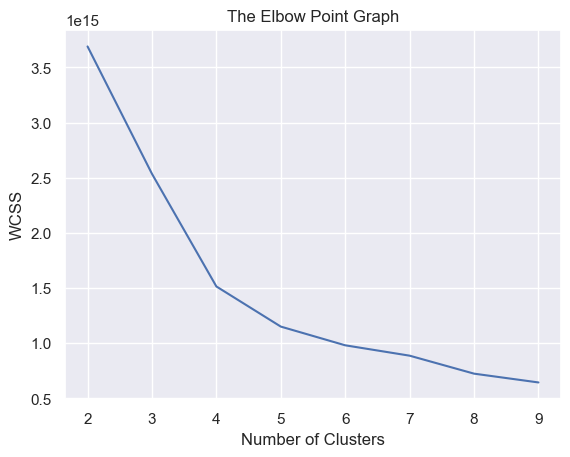

In [143]:
# plot an elbow graph

sns.set()
plt.plot(range(2,10), wcss)
plt.title('The Elbow Point Graph')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

In [145]:
from sklearn.metrics import silhouette_score

In [ ]:
silhouette_scores = []

for i in range(2,8):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=10)
    #kmeans.fit_predict(base_data_label_encoded)
    silhouette_scores.append(silhouette_score(base_data_label_encoded, kmeans.fit_predict(base_data_label_encoded)))
    #silhouette_scores.append(kmeans.inertia_)
    print("one loop completed")

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

def calculate_silhouette_scores(data):
    return [silhouette_score(data, KMeans(n_clusters=i, init='k-means++', random_state=10).fit_predict(data)) for i in range(2, 8)]


In [ ]:
# Plotting a bar graph to compare the results
plt.bar(range(2,11), silhouette_scores)
plt.xlabel('Number of clusters', fontsize = 20)
plt.ylabel('silhouette_score', fontsize = 20)
plt.show()